# Python Data Visualization Cheat Sheet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

# prepare data used for different plots
from datascipsych import datasets
raw = pl.read_csv(datasets.get_dataset_file("Osth2019"))
data = datasets.clean_osth(raw).filter(pl.col("phase") == "test")
perf = (
    data.group_by("subj", "probe_type")
    .agg(
        pl.col("response").mean(), 
        pl.col("RT").mean(),
    )
    .sort("subj", "probe_type")
)
conditions = (
    data.with_columns(
        response=pl.when(pl.col("response") == 0).then(pl.lit("new")).otherwise(pl.lit("old"))
    )
    .group_by("subj", "probe_type", "response")
    .agg(pl.col("RT").mean())
    .sort("subj", "probe_type", "response")
)
lures = (
    data.filter(pl.col("probe_type") == "lure")
    .group_by("subj", "lag")
    .agg(
        pl.col("response").mean(),
        pl.col("RT").mean()
    )
    .sort("subj", "lag")
)

## Figure style

Visual properties of figures can be quickly set by selecting a Seaborn style.

To set the style of figures made after that point, use `set_style`.

In [2]:
sns.set_style("ticks")

To temporarily set the style for one function, use the *context manager* `axes_style` in a `with` block. The example below (adapted from Seaborn's tutorial) loops over the four Seaborn styles and temporarily applies them for one plot using `axes_style`.

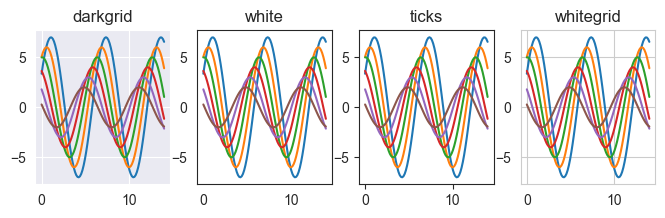

In [3]:
f = plt.figure(figsize=(8, 2))
styles = ["darkgrid", "white", "ticks", "whitegrid"]
gs = f.add_gridspec(1, len(styles))
x = np.linspace(0, 14, 100)
for i, style in enumerate(styles):
    with sns.axes_style(style):
        ax = f.add_subplot(gs[i])
        n = 6
        for j in range(1, n + 1):
            plt.plot(x, np.sin(x + j * .5) * (n + 2 - j))
        ax.set_title(style)

## Creating figures using Seaborn

Seaborn is designed to take data from a DataFrame to make a range of different plot types.

Seaborn functions take a DataFrame and various keyword arguments that specify which columns should be used to determine different aspects of the plot. The most commonly used arguments are `x`, the variable to plot on the x-axis; `y`, the variable to plot on the y-axis; and `hue`, the variable that determines which data points should be displaed in different colors.

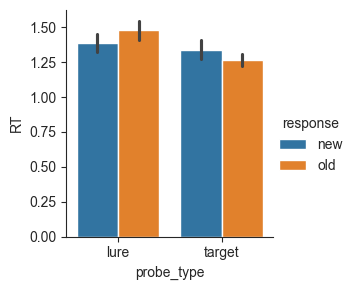

In [4]:
g = sns.catplot(
    data=conditions,  # data frame to take variables from
    x="probe_type",   # variable to plot on the x-axis
    y="RT",           # variable to plot on the y-axis
    hue="response",   # variable to split by to determine different colors
    kind="bar",       # kind of plot to use (varies by Seaborn function)
    height=3          # height of the figure in inches
)

Seaborn figure-level functions, which include `displot`, `catplot`, and `relplot`, return a `FacetGrid` object. Use the `set` method of `FacetGrid` to set properties of the figure. Use `set_axis_labels` to change the labels of the x-axis and y-axis.

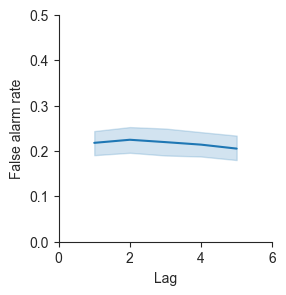

In [5]:
g = sns.relplot(data=lures, x="lag", y="response", kind="line", height=3)
g.set(xlim=(0, 6), ylim=(0, 0.5))
g.set_axis_labels("Lag", "False alarm rate");

Figures may also be split into multiple columns using the `col` argument.

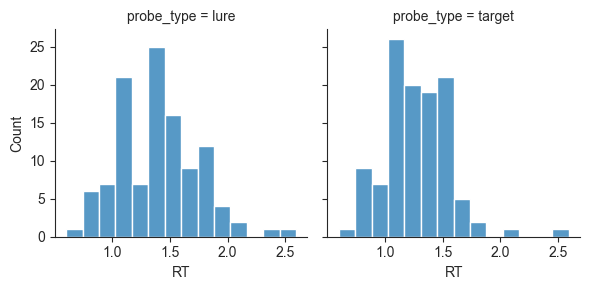

In [6]:
g = sns.displot(
    data=perf,         # take data from the perf DataFrame
    x="RT",            # plot RT on the x-axis
    col="probe_type",  # plot two columns with different probe types
    kind="hist",       # create a histogram
    height=3,          # set figure height to 3 inches
)

Using `row` instead will split plots by row.

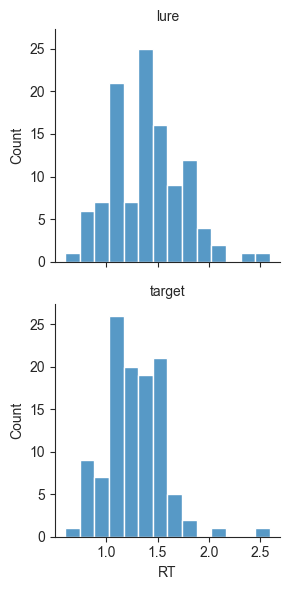

In [7]:
g = sns.displot(
    data=perf,
    x="RT",
    row="probe_type",
    kind="hist",
    height=3,
)
g.set_titles(row_template="{row_name}");  # simplify plot titles

## Saving figures

Once a figure has been generated, it can be saved to a graphics file for use in presentations.

Use `savefig` to save a figure to a graphics file. The type of file is automatically determine by the file extension. Here, the file name ends in `".pdf"`, so we get a PDF file. Another common choice is `".png"`, which saves to a PNG file. PNG files are supported by a wider range of software, but have limited resolution, whereas PDF files can be scaled to any size.

In [8]:
# g.savefig("histograms.pdf")  # uncomment and run to save figure

## Histogram plots

Use `displot` with `kind="hist"` to split a variable into bins and visualize how many values there are in each bin.

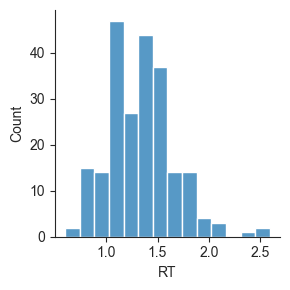

In [9]:
sns.displot(data=perf, x="RT", kind="hist", height=3);

To visualize how a variable differs between two conditions (here, whether the trial was a lure or a target), set the `hue` argument to the name of the column with that condition.

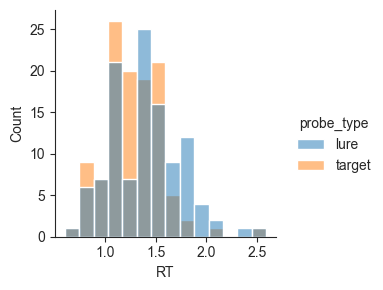

In [10]:
sns.displot(data=perf, x="RT", hue="probe_type", kind="hist", height=3);

## Kernel density estimation plots

Use `displot` with `kind="kde"` to plot an estimate of how frequently each value of a variable is observed in a dataset.

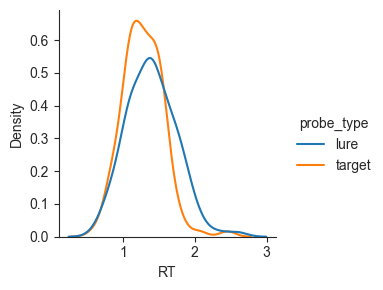

In [11]:
sns.displot(data=perf, x="RT", hue="probe_type", kind="kde", height=3);

## Bar plots

Use `catplot` with `kind="bar"` to show the central tendency of one or more conditions. Each bar shows the mean of the plotted variable. By default,the error bars show a 95% confidence interval of the mean, estimated using a bootstrap method.

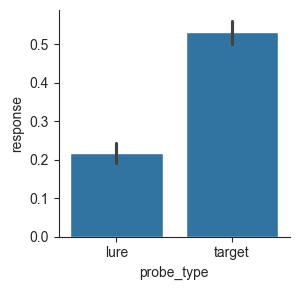

In [12]:
sns.catplot(data=perf, x="probe_type", y="response", kind="bar", height=3);

To change the orientation of the bars, switch the variables used for the `x` and `y` arguments.

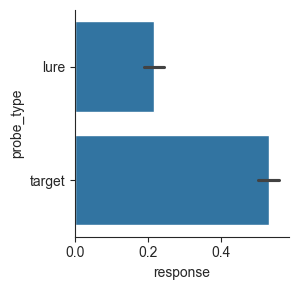

In [13]:
sns.catplot(data=perf, x="response", y="probe_type", kind="bar", height=3);

## Swarm plots

Use `catplot` with `kind="swarm"` to plot every individual data point in different conditions without overlapping any points.

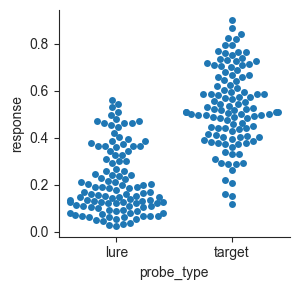

In [14]:
sns.catplot(data=perf, x="probe_type", y="response", kind="swarm", height=3);

## Strip plots

Use `catplot` with `kind="strip"` to plot every individual data point in different conditions within a strip. Points are allowed to overlap. Setting `alpha` to a value less than 1 will make points translucent, making it easier to see all the points.

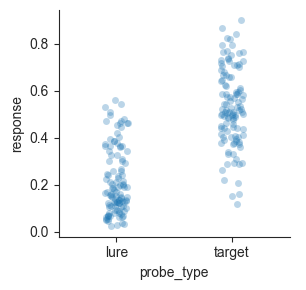

In [15]:
sns.catplot(
    data=perf, 
    x="probe_type", 
    y="response", 
    kind="strip",
    alpha=0.3,
    height=3,
);

## Box plots

Use `catplot` with `kind="box"` to make a box plot, which shows the 25th, 50th, and 75th percentiles, the range of the data, and any outliers.

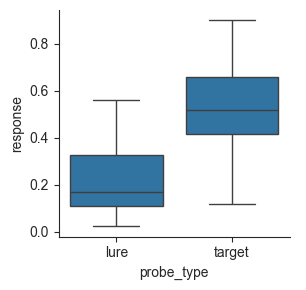

In [16]:
g = sns.catplot(data=perf, x="probe_type", y="response", kind="box", height=3)

## Scatterplots

Use `relplot` with `kind="scatter"` to plot how two variables vary with one another in a set of observations.

In [17]:
sns.relplot(data=response_time, x="target", y="lure", height=3);

NameError: name 'response_time' is not defined

## Line plots

Use `relplot` with `kind="line"` to plot how a dependent variable varies over different values of an independent variable.

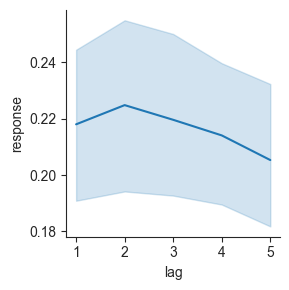

In [ ]:
sns.relplot(data=lures, x="lag", y="response", kind="line", height=3);

## Color palettes

Seaborn accepts a `palette` argument in functions that plot data with a range of hues, to change how different values in the data are mapped to different colors.

Use a qualitative color palette when there is no inherent ordering of categories.

In [ ]:
display(sns.color_palette())  # default palette
display(sns.color_palette("Set1"))
display(sns.color_palette("Set2"))
display(sns.color_palette("colorblind"))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

Use a sequential color palette when there is a continuous range of values that you want to visualize.

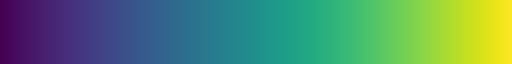

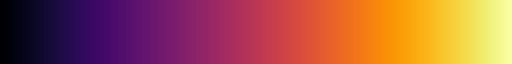

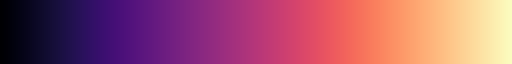

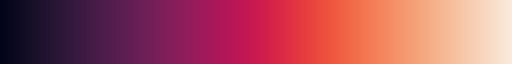

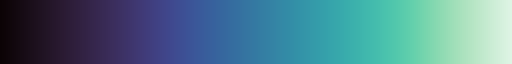

In [ ]:
display(sns.color_palette("viridis", as_cmap=True))
display(sns.color_palette("inferno", as_cmap=True))
display(sns.color_palette("magma", as_cmap=True))
display(sns.color_palette("rocket", as_cmap=True))
display(sns.color_palette("mako", as_cmap=True))

Use a diverging color palette when there is a meaningful center value (often zero) and you want to emphasize differences from that center value.

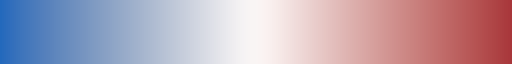

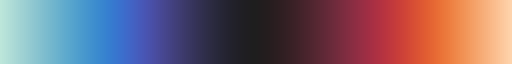

In [ ]:
display(sns.color_palette("vlag", as_cmap=True))
display(sns.color_palette("icefire", as_cmap=True))